# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "right" )


# Display the data table for preview
mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].value_counts()
len(mouse_count)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study.loc[mouse_study.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
duplicate_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = mouse_study[mouse_study["Mouse ID"] != "g989"]
new_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = new_data["Mouse ID"].value_counts()
len(new_mouse_count)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_statistics = pd.DataFrame({"Mean Tumor Volume": tumor_mean, 
                                "Median Tumor Volume": tumor_median,
                                "Tumor Volume Variance": tumor_var, 
                                "Tumor Volume Std. Dev.": tumor_std,
                                "Tumor Volume Std. Err.": tumor_sem})
tumor_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
single_line_summary = new_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
single_line_summary.head()


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

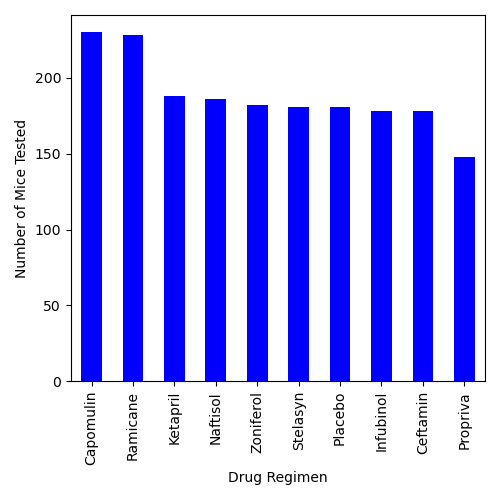

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
drug_timepoint = new_data['Drug Regimen'].value_counts()
drug_timepoint.plot(kind = "bar", color = "blue", figsize = (5,5), xlabel = "Drug Regimen", ylabel = "Number of Mice Tested")
xticklabels = drug_timepoint.index
plt.tight_layout()

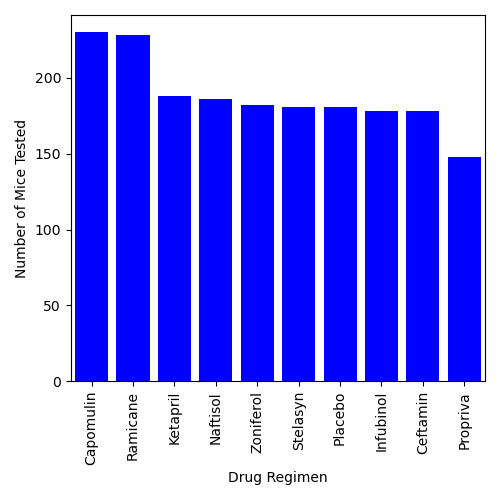

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = new_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values, counts.values, color = "blue")
plt.tight_layout()
plt.show()


<AxesSubplot:ylabel='Sex'>

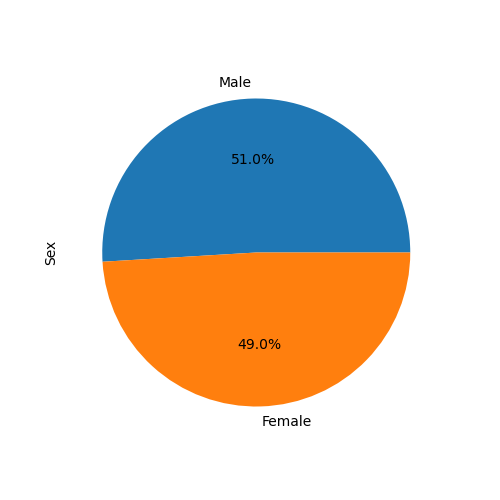

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
sex_distribution = new_data['Sex'].value_counts()
sex_distribution.plot(kind= "pie", figsize = (5,5), autopct="%1.1f%%")

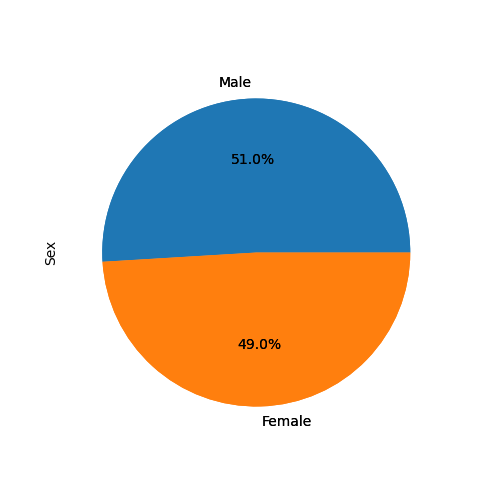

In [13]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = new_data['Sex'].value_counts()
sex_lables = ["Male", "Female"]
plt.pie(sex_counts, labels = sex_lables ,autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = new_data.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(last_timepoint, new_data, on = ['Mouse ID', 'Timepoint'], how = "left")
last_timepoint_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []
for value in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_timepoint_df.loc[last_timepoint_df['Drug Regimen'] == value, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    
    # add subset 
    
    
    # Determine IQR and outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = quartiles[0.75] - quartiles[0.25]
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq - (1.5 * iqr)
    print(f"{value}: below {lowerbound} or above {upperbound} can be outliers")

Capomulin: below 20.70456164999999 or above 28.486425109999995 can be outliers
Ramicane: below 17.912664470000003 or above 27.01120119 can be outliers
Infubinol: below 36.83290494999999 or above 48.310040109999996 can be outliers
Ceftamin: below 25.355449580000002 or above 40.93320176 can be outliers


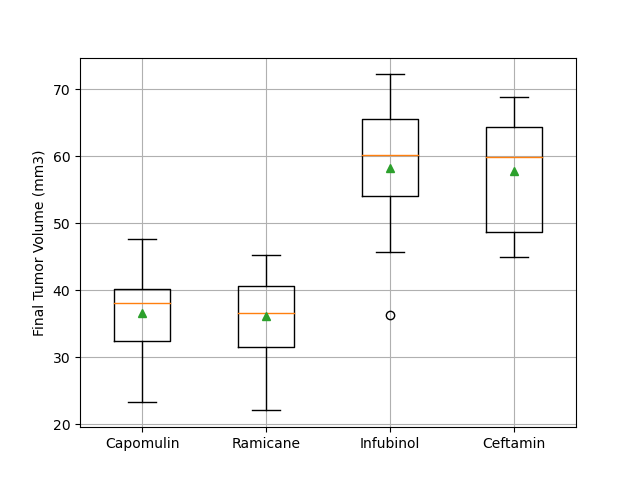

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
plt.boxplot(tumor_vol_data, labels = treatments, showmeans = True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid()
plt.show()


## Line and Scatter Plots

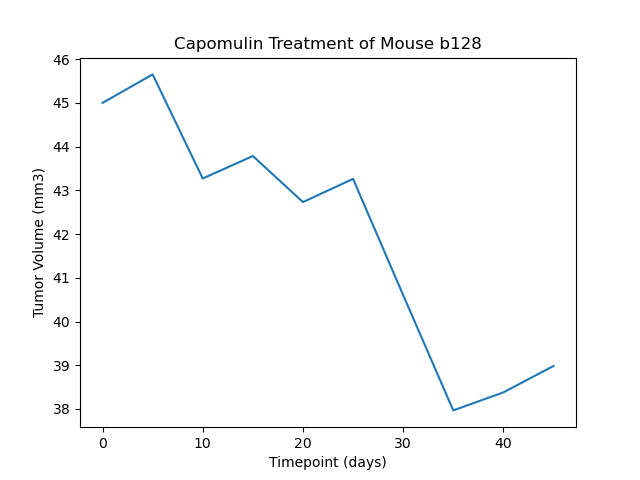

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
cap_mouse = new_data.loc[new_data["Mouse ID"] == "b128"]
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.title("Capomulin Treatment of Mouse b128")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

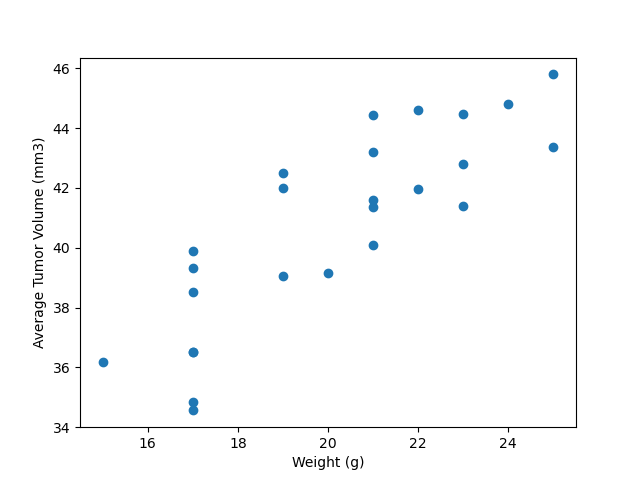

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
cap = new_data.loc[new_data["Drug Regimen"] == "Capomulin"]
cap_avg= cap.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


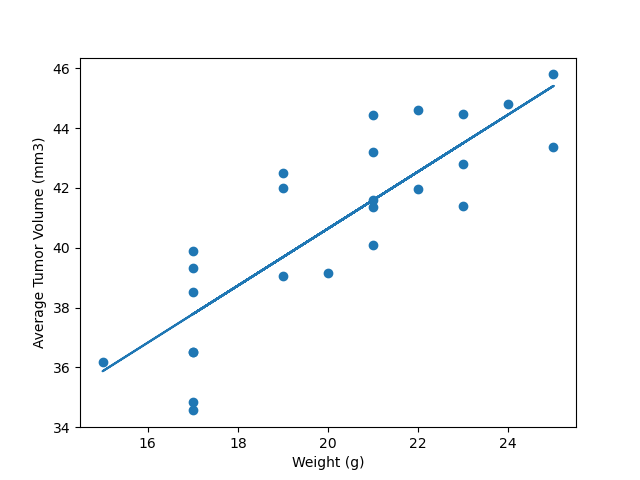

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
cap = new_data.loc[new_data["Drug Regimen"] == "Capomulin"]
cap_avg= cap.groupby(['Mouse ID']).mean()
correlation = st.pearsonr(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
cap_fit = cap_slope * cap_avg['Weight (g)'] + cap_int
plt.plot(cap_avg['Weight (g)'], cap_fit )
plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
